# Learning curves - Compare ML models - gov review meeting

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

In [2]:
save = True
outdir = Path('top6_lrn_crv_gov_meeting_results')
os.makedirs(outdir, exist_ok=True)

In [3]:
datadir = Path('../models/top6_lrn_crv_gov_meeting_data_from_runs')

## Metric per plot for all runs (nn and lgb) 

In [4]:
# Models
dd = {'run1': ('fc, dr=0.0', datadir / 'lrn_curve_reg_2019-2-10_h0-m28' / 'nn_reg_lrn_curve_scores.csv'),  # nn_reg
      'run2': ('fc, dr=0.2', datadir / 'lrn_curve_reg_2019-2-10_h0-m31' / 'nn_reg_lrn_curve_scores.csv'),  # nn_reg
      #'run3':  ('fc, dr=0.4', os.path.join('../../lrn_curve_reg_2019-2-10_h0-m38/nn_reg_lrn_curve_scores.csv')),  # nn_reg
        
      'run4': ('attn, dr=0.2', datadir / 'lrn_curve_reg_2019-2-10_h0-m40' / 'nn_reg_lrn_curve_scores.csv'),  # nn_reg
      'run5': ('attn, dr=0.4', datadir / 'lrn_curve_reg_2019-2-10_h0-m42' / 'nn_reg_lrn_curve_scores.csv'),  # nn_reg
      
      'run6': ('lgb_reg', datadir / 'lgb_reg_lrn_curve_reg_2019-2-11_h7-m59' / 'lgb_reg_lrn_curve_scores.csv')  # nn_reg
     }

In [5]:
scores = pd.read_csv(dd['run2'][1])
scores[:2]

,metric,tr_size,tr_set,f0
0,auroc_reg,22652,True,0.632276
1,auroc_reg,40281,True,0.679392


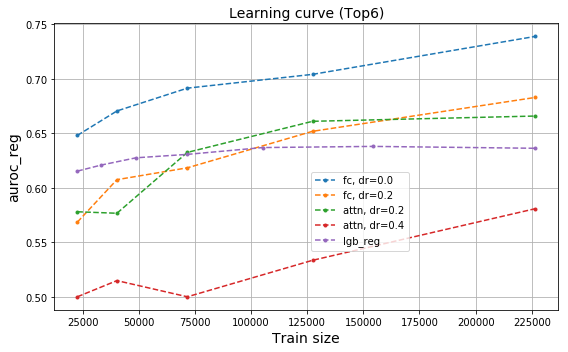

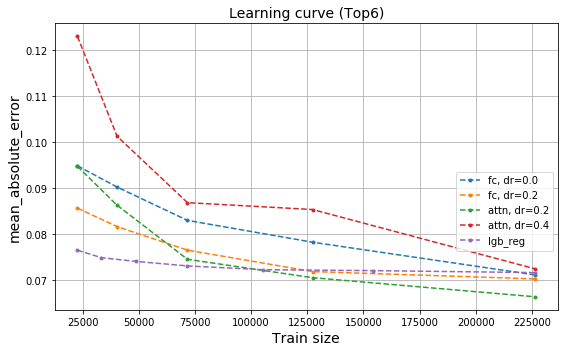

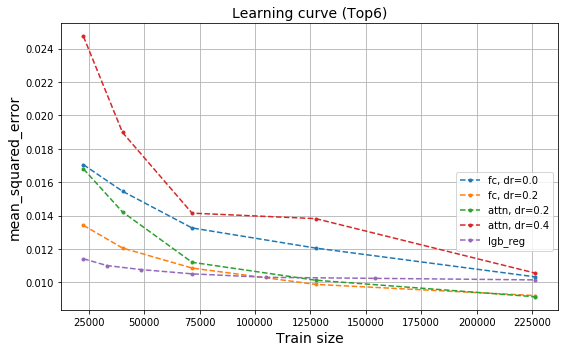

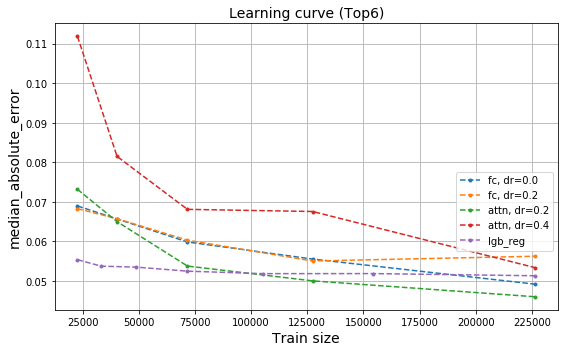

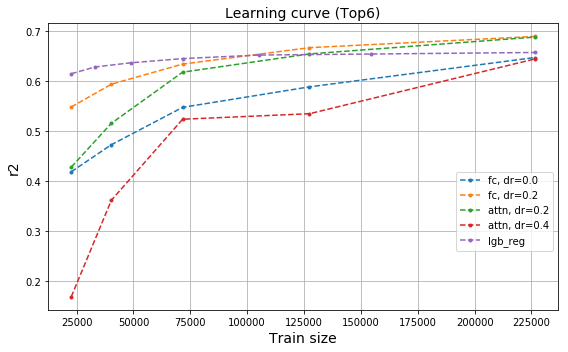

In [6]:
# Same metric for different runs
for j, metric_name in enumerate(scores['metric'].unique()):
    plt.figure(figsize=(8, 5))
    
    for i, (k, v) in enumerate(dd.items()):
        scores = pd.read_csv(dd[k][1])
        kk = scores[(scores['metric'] == metric_name)]
        kk_vl = kk[kk['tr_set'] == False]
        # kk_tr = kk[kk['tr_set'] == True]
        
        plt.plot(kk_vl['tr_size'], kk_vl['f0'], '.--', label=dd[k][0])
        plt.title('Learning curve (Top6)', fontsize=14)
        plt.xlabel('Training set size', fontsize=14)
        plt.ylabel(metric_name, fontsize=14)
        plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
        # plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))

    plt.tight_layout()
    plt.grid(True)
    
    if save:
        plt.savefig( outdir / (metric_name+'_nn_lgb.png') )

## Metric per plot for all runs (nn and lgb) --> ppt

In [7]:
# Models
dd = {'run2': ('FC',        datadir / 'lrn_curve_reg_2019-2-10_h0-m31' / 'nn_reg_lrn_curve_scores.csv'),    # fc, dr=0.2
      'run4': ('Attention', datadir / 'lrn_curve_reg_2019-2-10_h0-m40' / 'nn_reg_lrn_curve_scores.csv'),  # attn, dr=0.2
      'run6': ('LightGBM',  datadir / 'lgb_reg_lrn_curve_reg_2019-2-11_h7-m59' / 'lgb_reg_lrn_curve_scores.csv')
     }

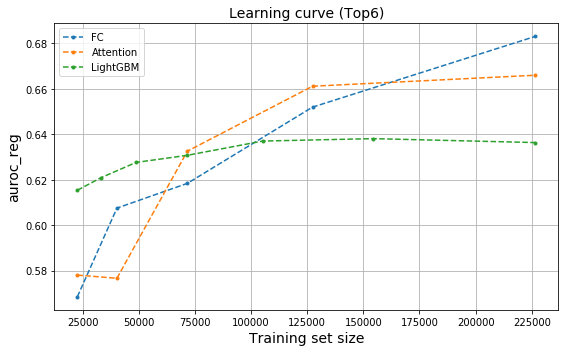

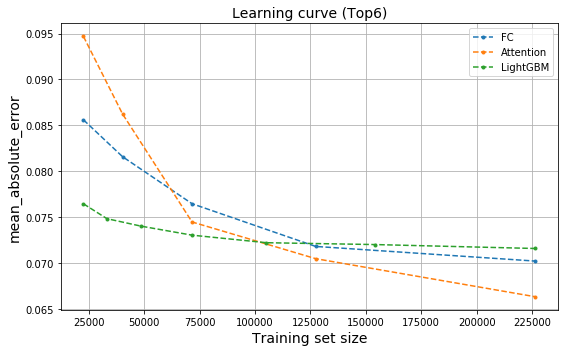

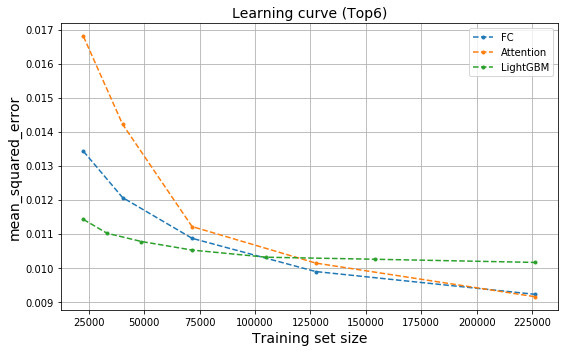

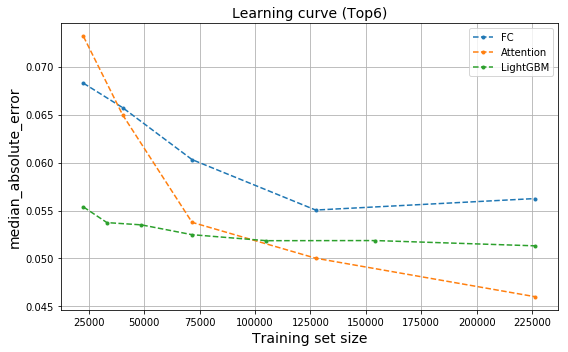

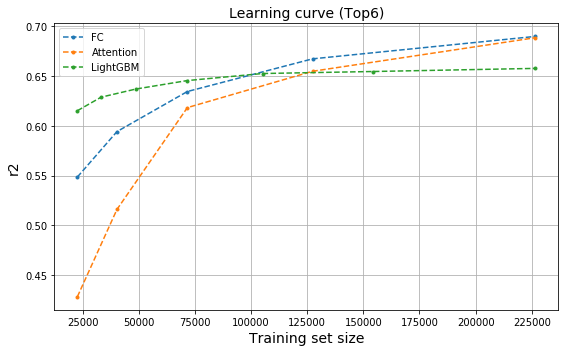

In [8]:
# Same metric for different runs
for j, metric_name in enumerate(scores['metric'].unique()):
    plt.figure(figsize=(8, 5))
    
    for i, (k, v) in enumerate(dd.items()):
        scores = pd.read_csv(dd[k][1])
        kk = scores[(scores['metric'] == metric_name)]
        kk_vl = kk[kk['tr_set'] == False]
        # kk_tr = kk[kk['tr_set'] == True]
        
        plt.plot(kk_vl['tr_size'], kk_vl['f0'], '.--', label=dd[k][0])
        plt.title('Learning curve (Top6)', fontsize=14)
        plt.xlabel('Training set size', fontsize=14)
        plt.ylabel(metric_name, fontsize=14)
        plt.legend(loc='best')
        # plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
        # plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))

    plt.tight_layout()
    plt.grid(True)
    
    if save:
        plt.savefig( outdir / ('ppt_' + metric_name + '_nn_lgb.png') )

## LightGBM learning curves

In [9]:
lgb = {'run1': ('lgb_reg', datadir / 'lgb_reg_lrn_curve_reg_2019-2-11_h7-m59' / 'lgb_reg_lrn_curve_scores.csv')}

In [10]:
df = pd.read_csv(lgb['run1'][1])
df.insert(loc=0, column='src', value='top6')

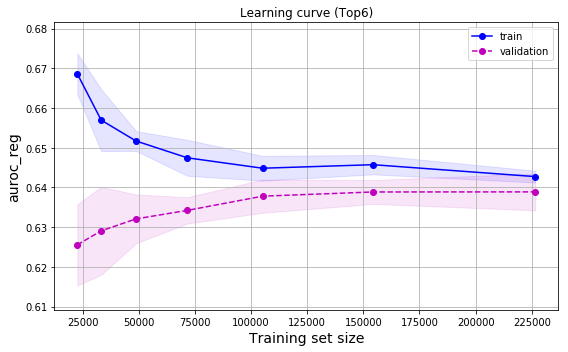

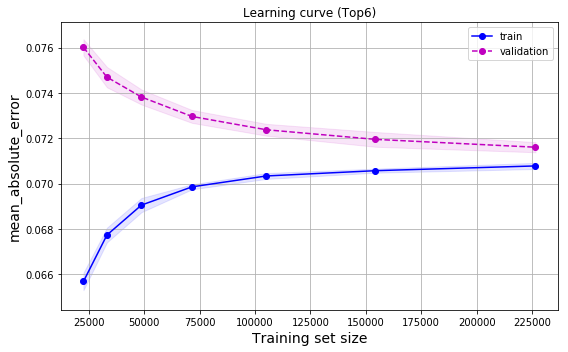

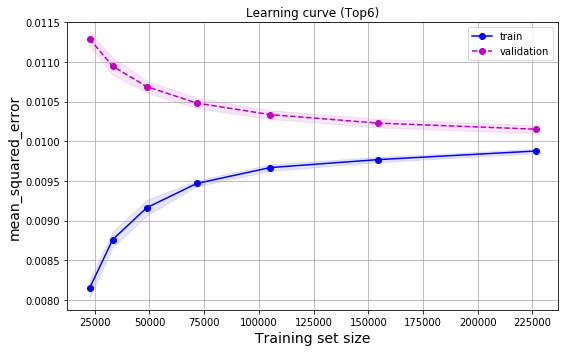

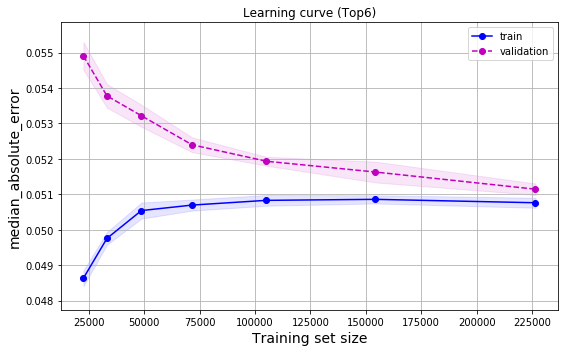

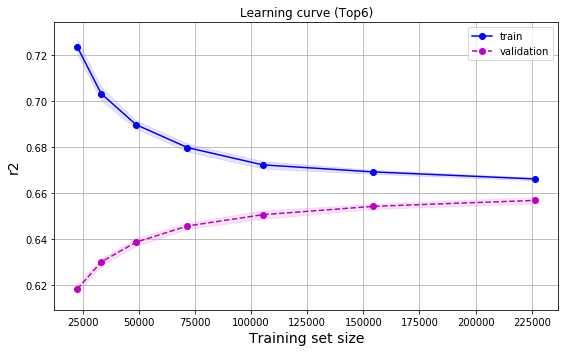

In [11]:
colors = ['b', 'r', 'k', 'c', 'm']
title = None

for i, metric_name in enumerate(df['metric'].unique()):
    dfm = df[df['metric']==metric_name].reset_index(drop=True)
    
    y_values = dfm.iloc[:, -5:].values
    y_ = y_values.min() * 0.01
    ymin = y_values.min()
    ymax = y_values.max()
    ylim = [ymin - y_, ymax + y_]
    
    fig = plt.figure(figsize=(8, 5))
    for j, s in enumerate(dfm['src'].unique()):
        dfs = dfm[dfm['src']==s].reset_index(drop=True)
        tr_sizes  = dfs['tr_size'].unique()
        tr_scores = dfs.loc[dfs['tr_set']==True, dfs.columns[-5:]]
        te_scores = dfs.loc[dfs['tr_set']==False, dfs.columns[-5:]]

        tr_scores_mean = np.mean(tr_scores, axis=1)
        tr_scores_std  = np.std(tr_scores, axis=1)
        te_scores_mean = np.mean(te_scores, axis=1)
        te_scores_std  = np.std(te_scores, axis=1)

        """
        plt.plot(tr_sizes, tr_scores_mean, '.-', color=colors[j], label='train') # label=s+'_tr'
        plt.plot(tr_sizes, te_scores_mean, '.--', color=colors[j], label='validation') # label=s+'_val'
        plt.fill_between(tr_sizes,
                         tr_scores_mean - tr_scores_std,
                         tr_scores_mean + tr_scores_std,
                         alpha=0.1, color=colors[j])
        plt.fill_between(tr_sizes,
                         te_scores_mean - te_scores_std,
                         te_scores_mean + te_scores_std,
                         alpha=0.1, color=colors[j])
        """
        
        plt.plot(tr_sizes, tr_scores_mean, 'o-', color='b', label='train') # label=s+'_tr'
        plt.plot(tr_sizes, te_scores_mean, 'o--', color='m', label='validation') # label=s+'_val'        
        
        plt.fill_between(tr_sizes,
                         tr_scores_mean - tr_scores_std,
                         tr_scores_mean + tr_scores_std,
                         alpha=0.1, color='b')
        plt.fill_between(tr_sizes,
                         te_scores_mean - te_scores_std,
                         te_scores_mean + te_scores_std,
                         alpha=0.1, color='m')
        
        if title is not None:
            plt.title(title)
        else:
            plt.title('Learning curve (Top6)')
        plt.xlabel('Training set size', fontsize=14)
        plt.ylabel(metric_name, fontsize=14)    
        # plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', ncol=1)
        plt.legend(loc='best')
        plt.grid(True)
        plt.tight_layout()
    
    plt.ylim(ylim)    
    
    # plt.savefig('lrn_curve_' + metric_name + '.png')
    if save:
        plt.savefig( outdir / ('ppt_' + metric_name + '_lgb.png') )

In [12]:
# dd = lgb

# # Same metric for different runs
# for j, metric in enumerate(scores['metric'].unique()):
#     plt.figure(figsize=(7, 5))
    
#     for i, (k, v) in enumerate(dd.items()):
#         scores = pd.read_csv(dd[k][1])
#         kk = scores[(scores['metric'] == metric)]
#         kk_vl = kk[kk['tr_set'] == False]
#         # kk_tr = kk[kk['tr_set'] == True]
#         plt.plot(kk_vl['tr_size'], kk_vl['f0'], '.--', label=dd[k][0])
#         plt.title('Top6')
#         plt.xlabel('Train size')
#         plt.ylabel(metric)
#         plt.legend(loc='best')

#     plt.tight_layout()
#     plt.grid(True)
#     # plt.savefig(metric+'_lgb.png')